In [9]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import random as rd
from sklearn import neighbors
import sklearn
import time

In [18]:
mat = scipy.io.loadmat('mnist-original.mat') 
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])
X = [data[i].reshape(784,1) for i in range(len(data))] # on créé une nouvelle liste qui va contenir nos matrices 28x28

k=10 # nombre de cluster utilisé
m=70000 # nombre de données utilisées
n=784  
tol=10**(-1)

[32847, 10150, 69056, 63423, 38976, 34899, 46214, 50567, 34113, 61591]
7524


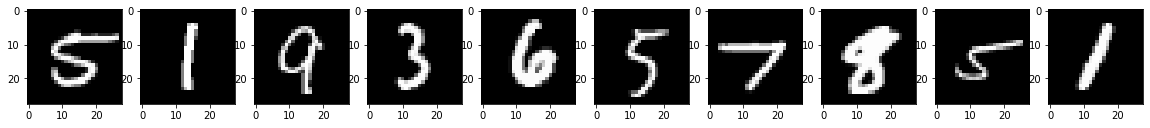

In [30]:
# on initialise les centroides aléatoirement et on associe les données correspondant 
clusters = {}
for i in range(k):
    clusters[i] = []
index=[]    
centroids= {}
for i in range(k):
    rand=rd.randint(0,m-1)
    index.append(rand)
    centroids[i] = X[rand]
    
fig, ax = plt.subplots(1,k,figsize=(20,2)) # affichage des centroïdes 
for i in range(k):
    ax[i].imshow(centroids[i].reshape(28,28),cmap='gray')

indice=[[] for i in range(k)]
for i in range(m):
    euc_dist = [np.linalg.norm(X[i] - centroids[j]) for j in range(k)]
    minn=np.argmin(np.asarray(euc_dist))
    clusters[minn].append(X[i])
    indice[minn].append(i)
print(index)
print(len(indice[1]))

In [31]:
def re_clusters(X, centroids, k):# fonction qui recalcule les clusters
    clusters = {}
    indice=[[] for i in range(k)]
    for i in range(k):
        clusters[i] = []
    for i in range(m):
        euc_dist = [np.linalg.norm(X[i] - centroids[j]) for j in range(k)]
        clusters[np.argmin(np.asarray(euc_dist))].append(X[i])
        indice[np.argmin(np.asarray(euc_dist))].append(i)
    return [clusters,indice]

def re_centroids(clusters, k):# fonction qui recalcule les centroids
    centroids= {}
    for i in range(k):
        centroids[i] = np.mean(clusters[i], axis=0)
        
    return centroids

def coherence(centroids_j, clusters_j):
    temp=[np.linalg.norm(data - centroids_j)**2 for data in clusters_j ]
    return sum(temp)

def quality(centroids, clusters):
    temp=[coherence(centroids[i],clusters[i]) for i in range(k)]
    return sum(temp)


In [32]:
clusters_nv=re_clusters(X, centroids, k)[0]
centroids_nv=re_centroids(clusters, k)
L=[]
start=time.time()
while abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv))>tol :
    L.append(abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv)))
    centroids=centroids_nv
    clusters=clusters_nv
    clusters_nv=re_clusters(X, centroids, k)[0]
    centroids_nv=re_centroids(clusters_nv, k)
end=time.time()

84
Temps de réalisation : 766.4068281650543 secondes


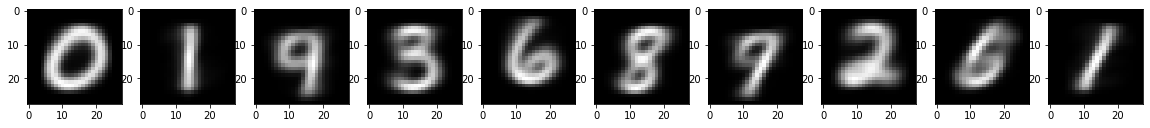

In [33]:
L.append(abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv)))
print(len(L))
print("Temps de réalisation : " + str(end-start) + " secondes")
fig, ax = plt.subplots(1,k,figsize=(20,2)) # affichage des centroïdes 
for i in range(k):
    ax[i].imshow(centroids[i].reshape(28,28),cmap='gray')

In [28]:
print(L)


[99464447950.78384, 17050286888.941437, 3916322820.8120117, 2711604589.8408203, 1500038917.8000488, 771433633.5432739, 478946848.2800293, 415820465.98760986, 416356834.1511841, 434577114.22958374, 434753880.79263306, 362866755.8334656, 254467120.93795776, 174819146.260437, 126728309.92529297, 102033402.57873535, 76202092.41107178, 56038314.403533936, 44134801.38650513, 35284725.78945923, 33895336.80932617, 30044349.11871338, 29645462.116760254, 27969700.639404297, 21861291.55178833, 13963452.976654053, 8736712.998138428, 5067492.990905762, 3212504.0981445312, 1232940.6268615723, 407800.15994262695, 186842.22821044922, 98613.20767211914, 36351.173583984375, 21284.514129638672, 4893.142395019531, 4694.5904541015625, 7359.8978271484375, 6037.573883056641, 715.3640747070312, 0.0]


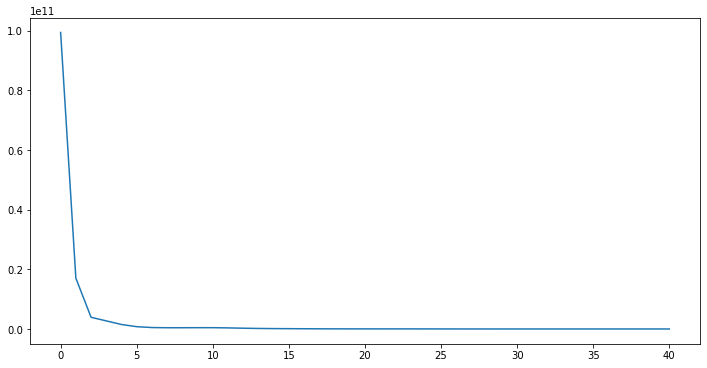

In [29]:
plt.figure(figsize=(12,6)) 
plt.plot([i for i in range(len(L))],L)
plt.show()

In [70]:
L[1]

18925578032.594055